In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_validate


In [2]:
data = pd.read_csv('patients_data_with_RVoutcomes.csv') #load
data = data.dropna(subset=['Birthday']) #preprocess data - drop nulls 
X = data.select_dtypes(exclude=['object', 'string'])



In [3]:
X = data.select_dtypes(exclude=['object', 'string'])
Y = data['RV Dysfunction']
feature_names = X.columns

In [4]:
missing_percentages = data.isnull().mean() * 100

# Identify columns with more than 20% missing data
columns_to_drop = missing_percentages[missing_percentages > 20].index

# Drop these columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Display the columns dropped
print(f"Columns dropped: {columns_to_drop.tolist()}")

Columns dropped: ['CO_td', 'LVs', 'LVd', 'LVmin', 'SAs', 'SAd', 'HR_tte', 'EA', 'VLA', 'MVmg', 'TVmg', 'PVpg']


In [53]:
from sklearn.impute import KNNImputer

# Get only numeric columns from the original data for imputation
numeric_data = data.select_dtypes(include=[np.number])

# Initialize the KNN imputer with improved parameters
imputer = KNNImputer(
    n_neighbors=5,  # Adjust this number based on your dataset size
    weights='uniform',  # You can try 'distance' as an alternative
    metric='nan_euclidean'  # Handles missing values during distance calculation
)

# Apply imputation to numeric features
imputed_array = imputer.fit_transform(numeric_data)

# Convert back to DataFrame with original column names
imputed_df = pd.DataFrame(imputed_array, columns=numeric_data.columns, index=numeric_data.index)

# Replace the numeric columns in the original dataframe with imputed values
for col in imputed_df.columns:
    data[col] = imputed_df[col]

# Now select features for modeling from the imputed data
X = data.select_dtypes(exclude=['object', 'string'])
data = data.dropna(subset=['RV Dysfunction'])
Y = data['RV Dysfunction']
Y_grouped = Y.replace({
    'Moderate': 'High Dysfunction',
    'Severe': 'High Dysfunction',
    'Normal': 'Low Dysfunction',
    'Mild': 'Low Dysfunction'
})
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_grouped)


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_grouped)



In [54]:
#Standardize features to mean=0, variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #scaling each feature down to 0-1 



Cross-Validation Scores: [0.61052632 0.54736842 0.55319149 0.54255319 0.61702128]
Mean CV Accuracy: 0.5741 (+/- 0.0652)


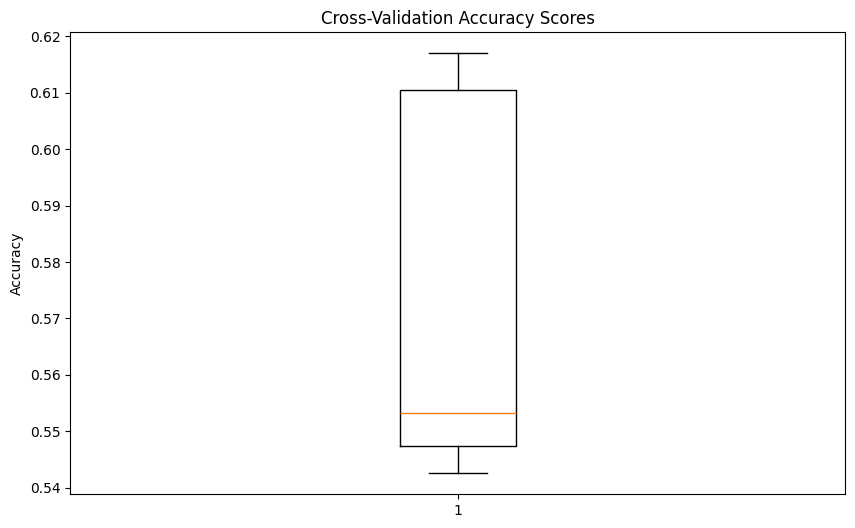

In [55]:
# Perform Cross-Validation
def perform_cross_validation(X, y, model, cv=5):
    # Use StratifiedKFold to maintain class distribution
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Compute cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    
    # Print cross-validation results
    print(f"\nCross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return cv_scores

# Initialize the model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Perform cross-validation
cv_scores = perform_cross_validation(X_scaled, Y_encoded, log_reg)

# Visualize Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()


[2 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 1 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 1 2 1 2 2 2 2 2 1
 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]


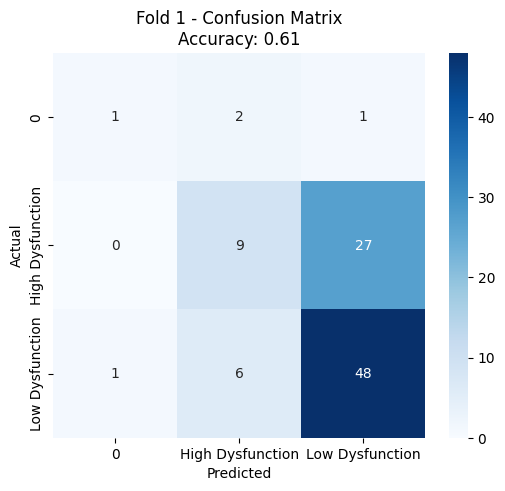

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_49695/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


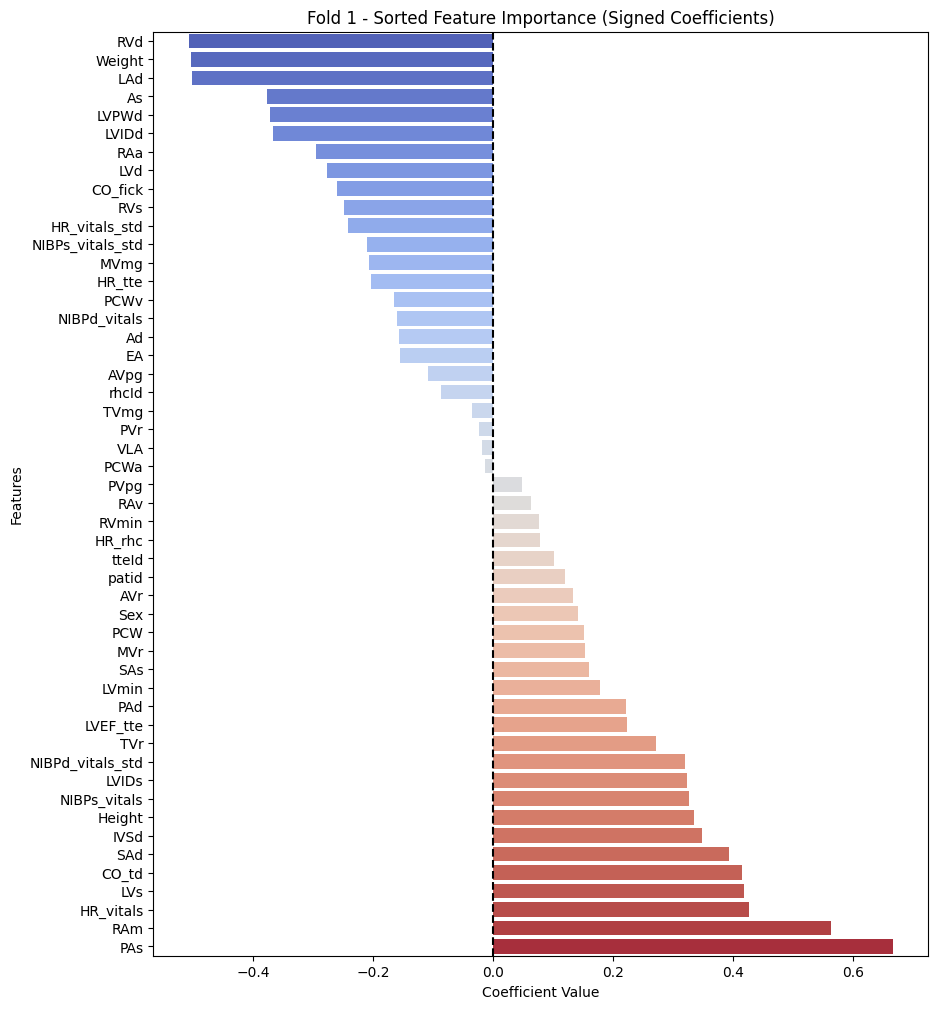

[2 1 2 2 1 2 2 0 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 1 2 1 1 2 1 1 2 2 2 2 1
 2 1 2 2 2 1 1 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1 1
 2 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2]


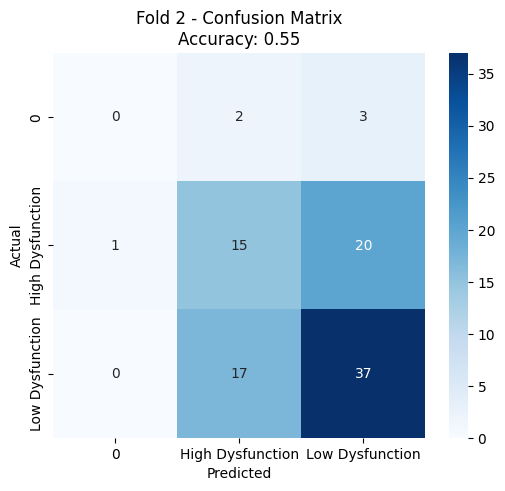

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_49695/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


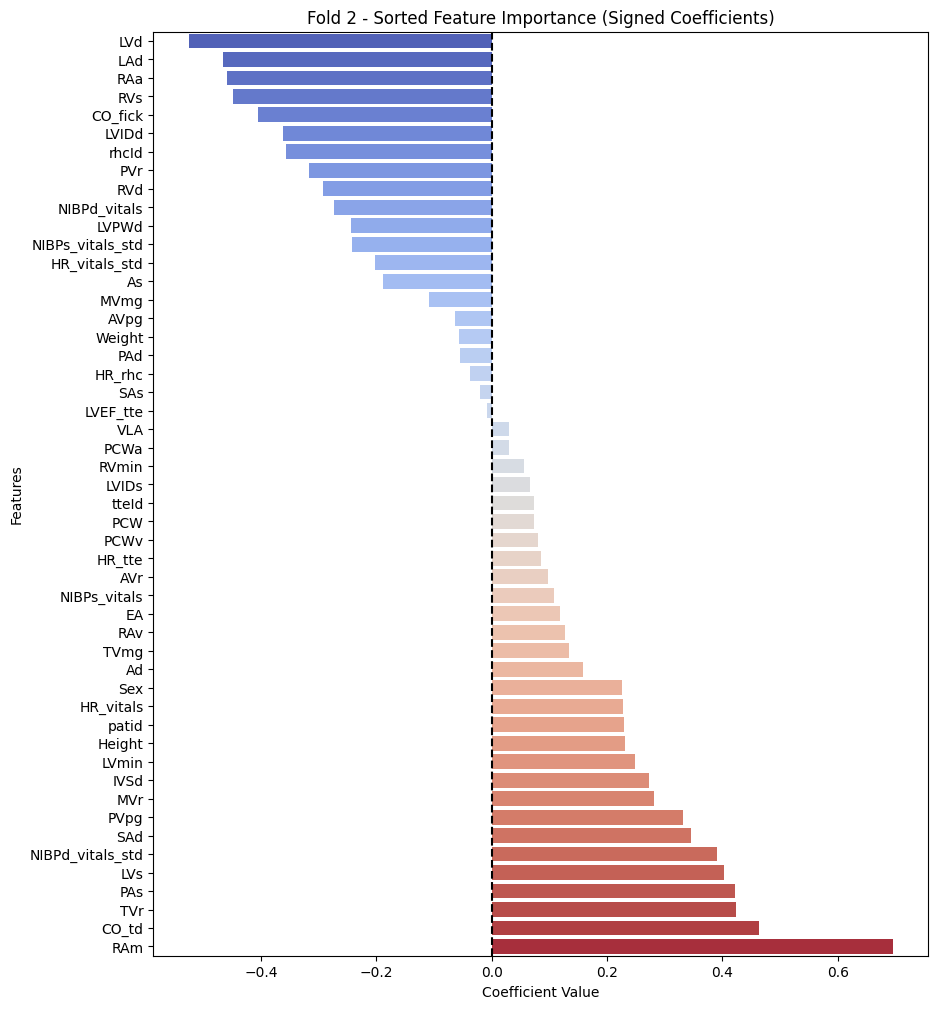

[1 2 1 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 1 2
 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 2 1 2 2 1 1 2 2 1 1 2 0 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2]


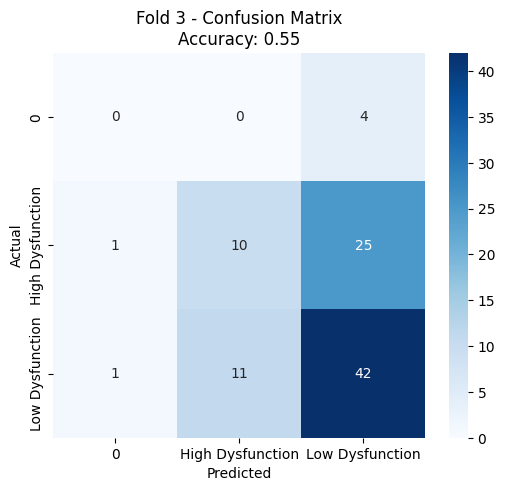

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_49695/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


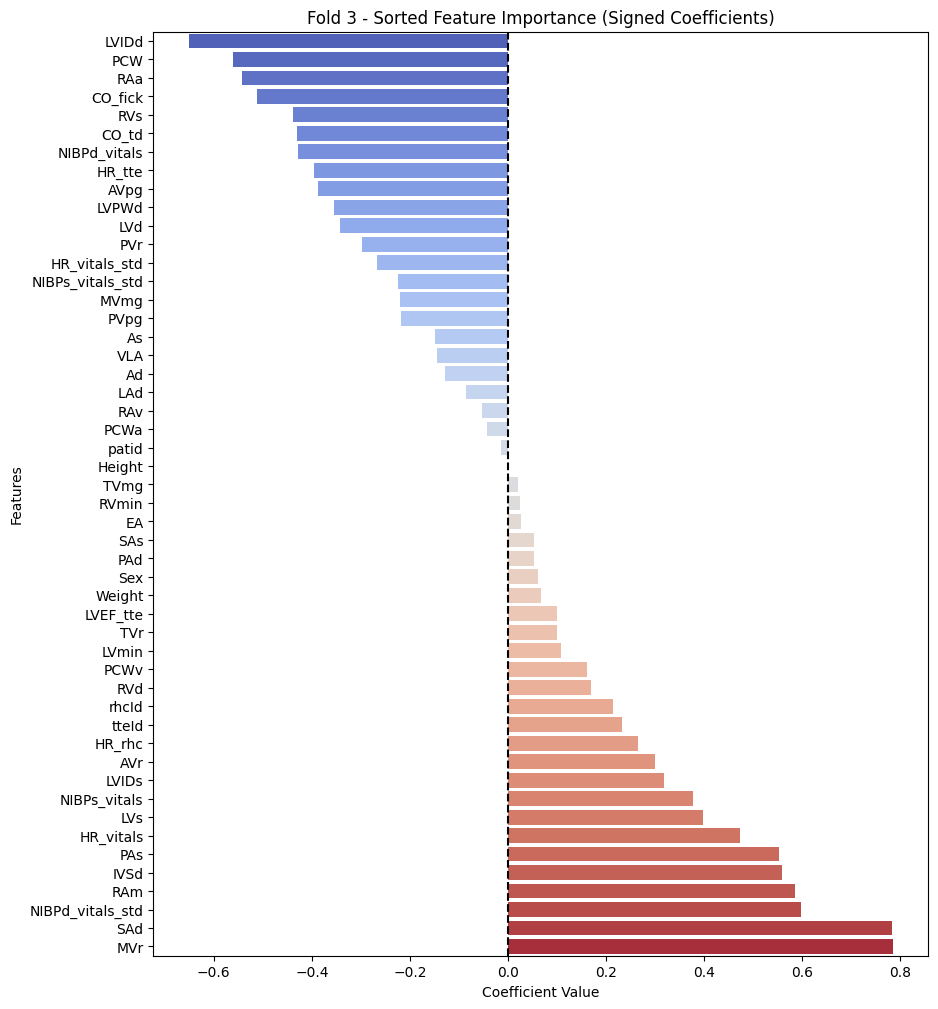

[1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 1 1 2 2 2 2 2 2 2
 1 0 1 2 2 0 2 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 2 1 1 2 2 2 2 2 1 1 1 1 2 1 1
 1 2 1 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 2 2]


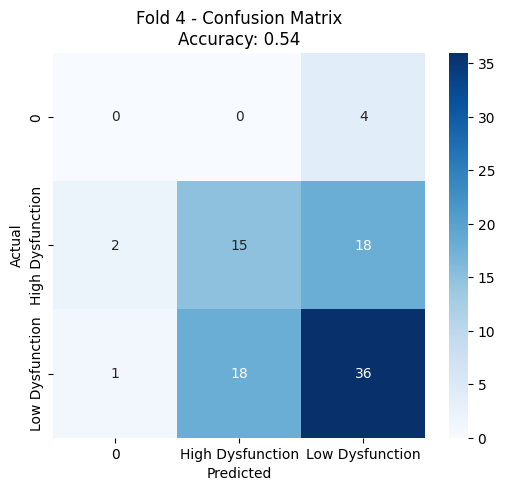

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_49695/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


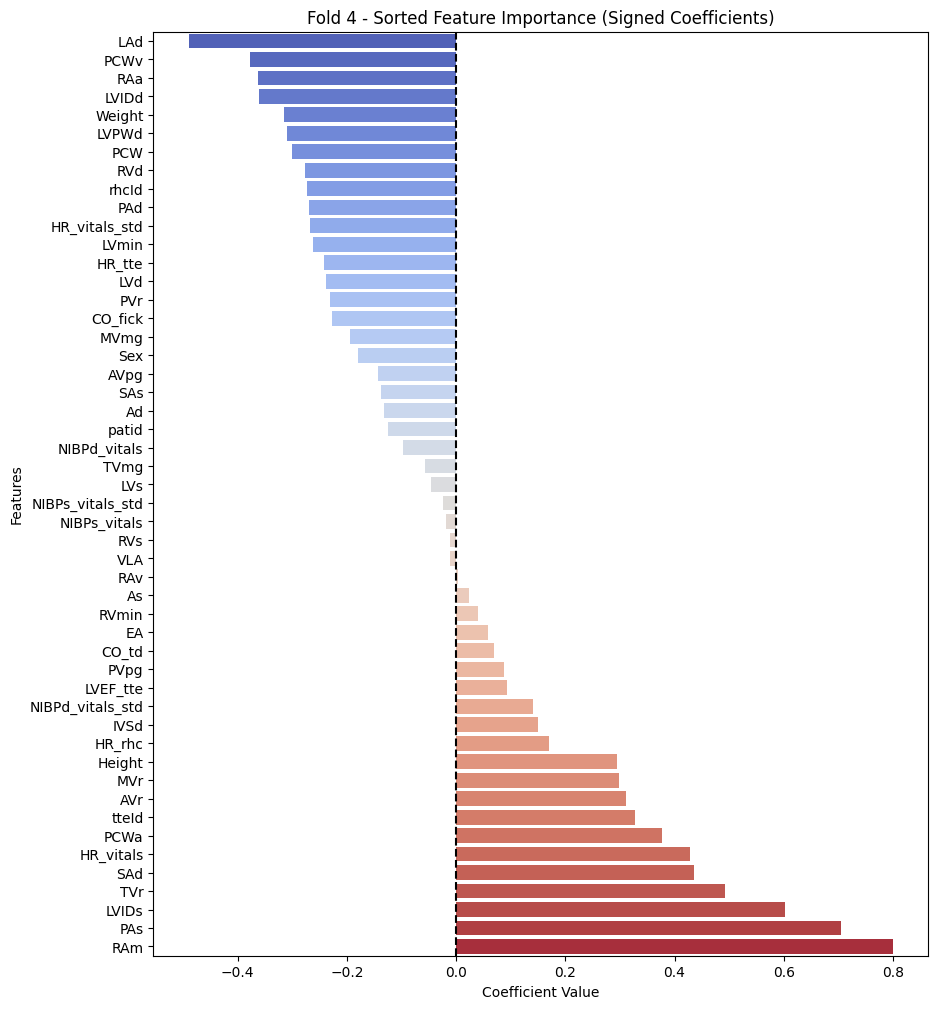

[2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 2 2 1 0 2 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 2 0 2 2 1 2 2 2 2 1 1 2 2
 2 2 1 1 1 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2]


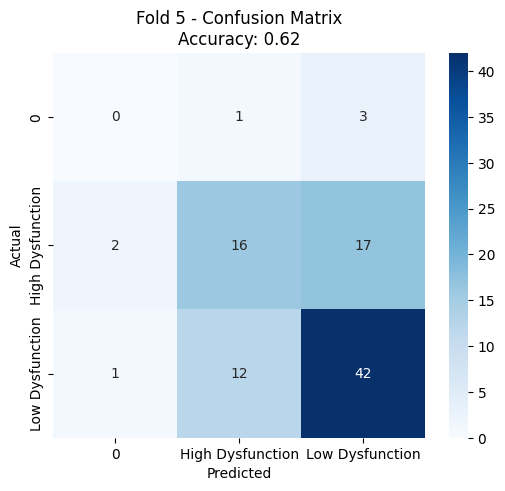

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_49695/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


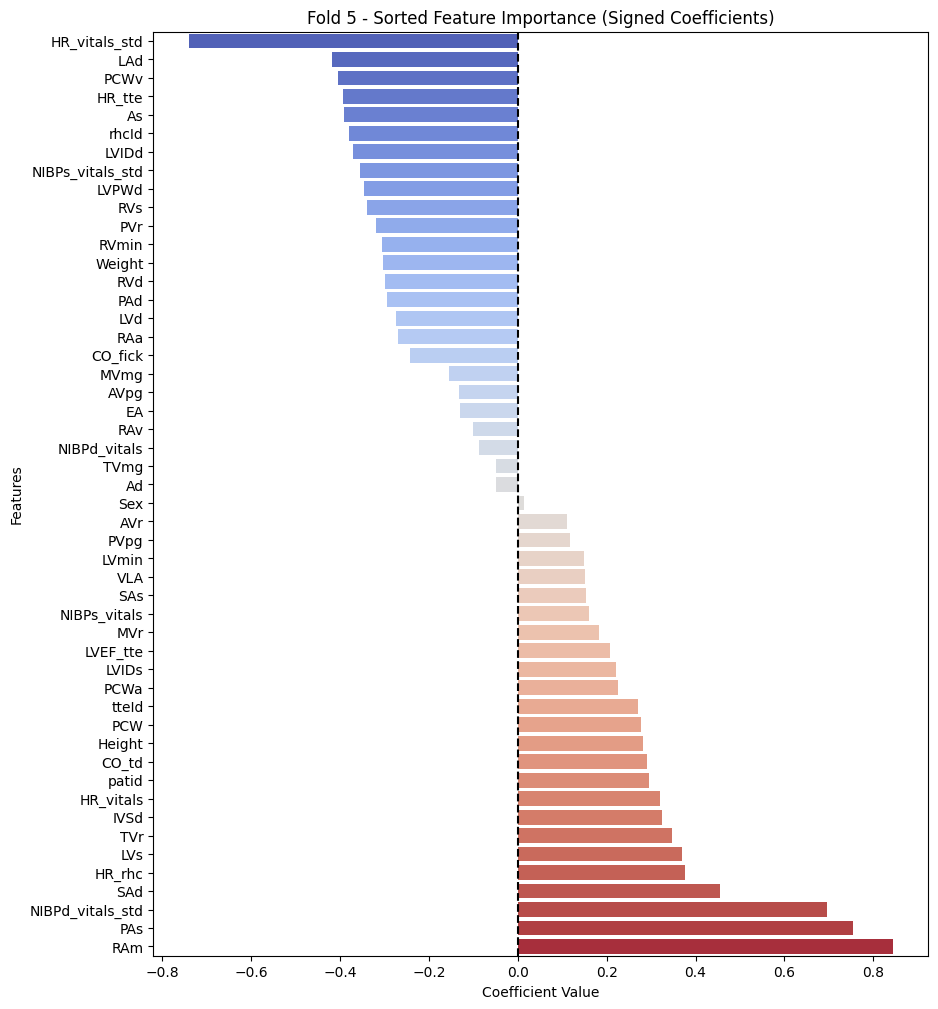

'Blue for negative & Red for positive impact.\nFeatures with positive coefficients (red) increase the probability of the target outcome.\nFeatures with negative coefficients (blue) decrease the probability of the target outcome.\nFeatures near 0 have low impact on predictions.'

In [56]:
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coefs = []
feature_names = X.columns  # Assuming X is a DataFrame
#print(feature_names)
for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, Y_encoded)):
    # Train model
    log_reg.fit(X_scaled[train_idx], Y_encoded[train_idx])
    
    # Store coefficients
    coefs.append(log_reg.coef_[0])  # Store raw coefficients
    
    # Confusion matrix plot
    y_pred = log_reg.predict(X_scaled[val_idx])
    cm = confusion_matrix(Y_encoded[val_idx], y_pred)
    print(y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Fold {fold+1} - Confusion Matrix\nAccuracy: {accuracy_score(Y_encoded[val_idx], y_pred):.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Sort by actual coefficient values
    coef_values = log_reg.coef_[0]
    sorted_indices = np.argsort(coef_values)  # Sort by raw values (not absolute)
    sorted_features = np.array(feature_names)[sorted_indices]
    sorted_coef_values = coef_values[sorted_indices]

    # Feature importance plot
    plt.figure(figsize=(10, 12))
    sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction
    plt.axvline(x=0, color='black', linestyle='--')  # Add vertical line at 0 for reference
    plt.title(f'Fold {fold+1} - Sorted Feature Importance (Signed Coefficients)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()
    
'''Blue for negative & Red for positive impact.
Features with positive coefficients (red) increase the probability of the target outcome.
Features with negative coefficients (blue) decrease the probability of the target outcome.
Features near 0 have low impact on predictions.'''


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

#Pipeline object that chains multiple transformations together.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale data
    ('model', LogisticRegression(multi_class='ovr', max_iter=500, class_weight='balanced'))  # Step 2: Train model
])


/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Use

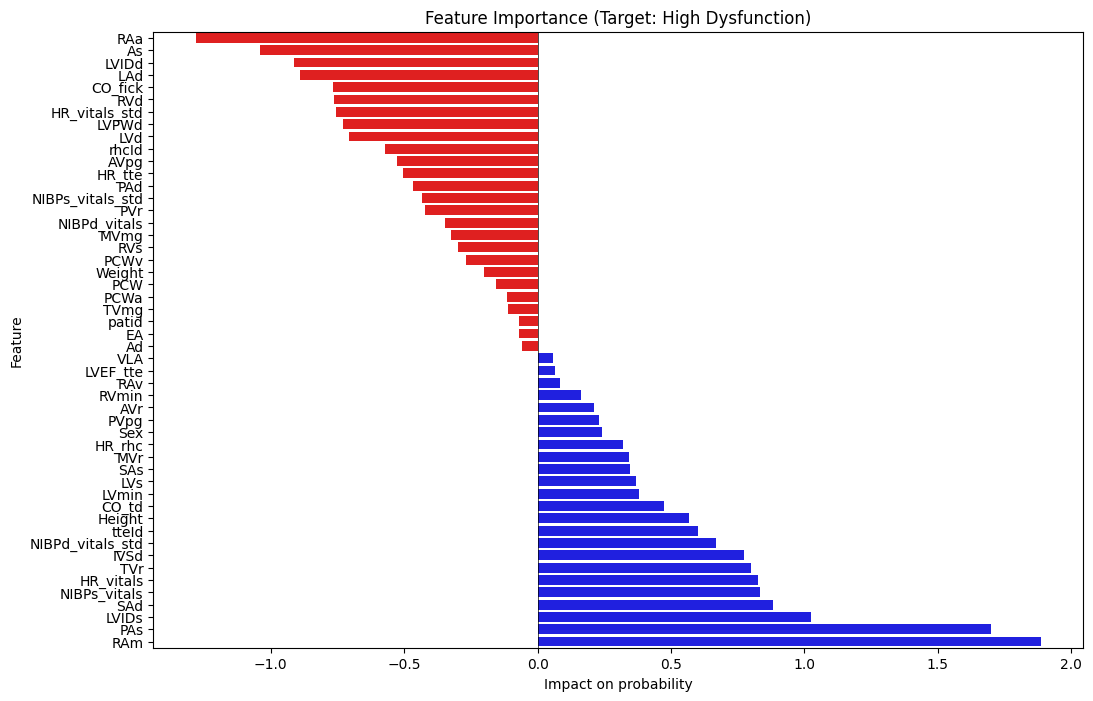

In [58]:
def plot_feature_importance(results, feature_names, class_name):
    coefs = [estimator.named_steps['model'].coef_[0] for estimator in results['estimator']]

    avg_coefs = np.mean(coefs, axis=0)
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': avg_coefs
    }).sort_values('Importance', ascending=True)  # Changed to ascending=True
    
    # Color code based on coefficient sign
    colors = ['red' if x < 0 else 'blue' for x in importance_df['Importance']]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)
    plt.title(f'Feature Importance (Target: {class_name})')
    plt.xlabel('Impact on probability')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.show()

results = cross_validate(
    pipeline,
    X_scaled,  # Your scaled features
    Y_encoded,  # Your encoded target
    cv=5,
    return_estimator=True  # This is important to get the fitted models
)
# Plot for High Dysfunction
plot_feature_importance(results, feature_names, "High Dysfunction")
#plot_feature_importance(results, feature_names, "Low Dysfunction")

In [59]:
data = pd.read_csv('patients_data_with_RVoutcomes.csv')
#print(data.columns.tolist())
# List of features to use, including the target variable
selected_features = [
    'patKey', 'patid', 'rhcId', 'RHCDate', 'Sex', 'Height', 'Weight', 'Birthday',
    'CO_td', 'CO_fick', 'PCW', 'PCWa', 'PCWv', 'PAs', 'PAd', 'RVs', 'RVmin', 'RVd',
    'RAa', 'RAv', 'RAm', 'LVs', 'LVd', 'LVmin', 'SAs', 'SAd', 'HR_rhc', 'HR_vitals',
    'HR_vitals_std', 'NIBPs_vitals', 'NIBPs_vitals_std', 'NIBPd_vitals',
    'NIBPd_vitals_std', 'As', 'Ad', 'tteId', 'TTEDate', 'LVIDd', 'LVIDs', 'HR_tte',
    'LVEF_tte', 'EA', 'IVSd', 'LVPWd', 'LAd', 'VLA', 'AVr', 'AVpg', 'MVr', 'MVmg',
    'TVr', 'TVmg', 'PVr', 'PVpg', 'AVr_str', 'MVr_str', 'TVr_str', 'PVr_str', 'patkey',
    'RV Dysfunction'
]

# Drop any rows with NaN values in any of the selected features
data = data[selected_features].dropna()

#Convert date/time object to number of days
data['RHCDate'] = pd.to_datetime(data['RHCDate']).apply(lambda x: x.toordinal())
data['TTEDate'] = pd.to_datetime(data['TTEDate']).apply(lambda x: x.toordinal())
data['Birthday'] = pd.to_datetime(data['Birthday']).apply(lambda x: x.toordinal())


In [60]:
feature_names = X.columns
print(feature_names)

Index(['patid', 'rhcId', 'Sex', 'Height', 'Weight', 'CO_td', 'CO_fick', 'PCW',
       'PCWa', 'PCWv', 'PAs', 'PAd', 'RVs', 'RVmin', 'RVd', 'RAa', 'RAv',
       'RAm', 'LVs', 'LVd', 'LVmin', 'SAs', 'SAd', 'HR_rhc', 'HR_vitals',
       'HR_vitals_std', 'NIBPs_vitals', 'NIBPs_vitals_std', 'NIBPd_vitals',
       'NIBPd_vitals_std', 'As', 'Ad', 'tteId', 'LVIDd', 'LVIDs', 'HR_tte',
       'LVEF_tte', 'EA', 'IVSd', 'LVPWd', 'LAd', 'VLA', 'AVr', 'AVpg', 'MVr',
       'MVmg', 'TVr', 'TVmg', 'PVr', 'PVpg'],
      dtype='object')


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [64]:
print(set(y_train))
print(set(y_test))

{np.int64(0), np.int64(1), np.int64(2)}
{np.int64(0), np.int64(1), np.int64(2)}



--- Default Random Forest ---

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.25      0.33        36
           2       0.58      0.85      0.69        53

    accuracy                           0.57        95
   macro avg       0.36      0.37      0.34        95
weighted avg       0.52      0.57      0.51        95


Confusion Matrix:


/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

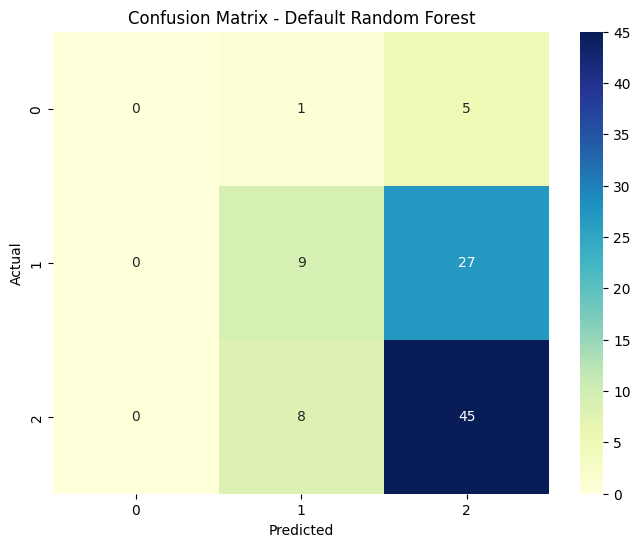

ROC AUC: 0.6142


ValueError: multiclass format is not supported

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate(model, model_name, X_train, Y_train, X_test, Y_test):
    """
    Trains and evaluates a classification model.
    Prints classification report, confusion matrix, and calculates ROC AUC.
    """
    print(f"\n--- {model_name} ---")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))

    # Print confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(Y_test, Y_pred)
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate ROC AUC
    if hasattr(model, "predict_proba"):  # Ensure the model supports probability predictions
        Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
        roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class="ovr")

        print(f"ROC AUC: {roc_auc:.4f}")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

def tune_hyperparameters(X_train, y_train, n_iter=20, cv=5, random_state=42):
    """
    Tunes hyperparameters for a Random Forest classifier using RandomizedSearchCV.
    
    Parameters:
    - X_train: Training feature matrix.
    - y_train: Training labels.
    - n_iter: Number of random parameter sets to try (default: 20).
    - cv: Number of cross-validation folds (default: 5).
    - random_state: Random seed for reproducibility (default: 42).
    
    Returns:
    - best_model: The trained Random Forest model with the best hyperparameters.
    - best_params: The best hyperparameter combination found.
    """
    
    # Define the hyperparameter search space
    param_dist = {
        'n_estimators': [50, 100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2'],  # Fixed 'auto' issue
        'bootstrap': [True, False]
    }
    
    # Initialize the Random Forest classifier
    rf = RandomForestClassifier(random_state=random_state)
    
    # Perform Randomized Search with Cross-Validation
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        scoring='accuracy',
        random_state=random_state,
        n_jobs=-1,
        error_score='raise'  # Debug failing fits
    )
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Extract the best model and parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    return best_model, best_params

# Load Data and Split
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Step 1: Train and Evaluate the Default Model
default_model = RandomForestClassifier(random_state=42)
train_and_evaluate(default_model, "Default Random Forest", X_train, y_train, X_test, y_test)

# Step 2: Tune Hyperparameters - Fixed the function call
best_model, best_params = tune_hyperparameters(X_train, y_train)

print("Best Hyperparameters:", best_params)

# Step 3: Train and Evaluate the Best Model
train_and_evaluate(best_model, "Tuned Random Forest", X_train, y_train, X_test, y_test)


The higher the AUC, the better the model is at distinguishing between the positive and negative classes.

We are using 5-fold cross-validation. This means the training data is split into 5 parts. GridSearchCV trains and tests the model 5 times, each time using a different part as the test set.
Performance Evaluation: GridSearchCV keeps track of how well each hyperparameter combination performs during cross-validation.

Regularization: Regularization is a technique used to prevent overfitting in machine learning models. Overfitting happens when a model learns the training data too well, including its noise and specific details, and performs poorly on new, unseen data. Regularization adds a penalty to the model's complexity to discourage it from overfitting.
